# Определение определяющих успешность  игры закономерностей

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

## Цель проекта:
Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Описание проекта
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


## Описание данных
<ul style="border:solid black 2px; padding: 20px">
    <b>Таблица games (информация о продажах игр):</b>
    <li><i>Name</i> — название игры</li>
    <li><i>Platform</i> — платформа</li>
    <li><i>Year_of_Release</i> — год выпуска</li>
    <li><i>Genre</i> — жанр игры</li>
    <li><i>NA_sales</i> — продажи в Северной Америке (миллионы проданных копий)</li>
    <li><i>EU_sales</i> — продажи в Европе (миллионы проданных копий)</li>
    <li><i>JP_sales</i> — продажи в Японии (миллионы проданных копий)</li>
    <li><i>Other_sales</i> — продажи в других странах (миллионы проданных копий)</li>
    <li><i>Critic_Score</i> — оценка критиков (максимум 100)</li>
    <li><i>User_Score</i> — оценка пользователей (максимум 10)</li>
    <li><i>Rating</i> — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.</li>
</ul>
<b><u>Обратите внимание</u></b>: Данные за 2016 год могут быть неполными.

## Откроем файл с данными и изучим общую информацию

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

from scipy import stats as st

In [ ]:
df = pd.read_csv('/datasets/games.csv')

In [ ]:
# <приведем формат к читабельному виду>
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
display(df)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.00,Action,0.00,0.00,0.01,0.00,nan,NaN,NaN
16711,LMA Manager 2007,X360,2006.00,Sports,0.00,0.01,0.00,0.00,nan,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.00,Adventure,0.00,0.00,0.01,0.00,nan,NaN,NaN
16713,Spirits & Spells,GBA,2003.00,Platform,0.01,0.00,0.00,0.00,nan,NaN,NaN


In [ ]:
print(df.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


<b>Названия столбцов необходимо привести к нижнему регистру.</b>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


1. <b>Столбец <i>'Year_of_Release'</i> можно привести к типу <u>int</u>, так как это год выпуска.</b>
2. <b>Столбец <i>'User_Score'</i> нужно привести к типу <u>float</u>, так как это оценка(число).</b>

In [ ]:
df.isnull().sum()*100 / len(df)

Name               0.01
Platform           0.00
Year_of_Release    1.61
Genre              0.01
NA_sales           0.00
EU_sales           0.00
JP_sales           0.00
Other_sales        0.00
Critic_Score      51.32
User_Score        40.09
Rating            40.48
dtype: float64

<b>Немало пропусков наблюдается в столбцах <i>'Critic_Score'</i>, <i>'User_Score'</i>, <i>'Rating'</i>.</b>

In [ ]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


In [ ]:
print(df.duplicated().sum())

0


<b>Дубликатов не наблюдается.</b>

<b>Вывод:</b><br>
На данном этапе выявленны следующие проблемы, которые необходимо решить:
1. В датасете, где это необходимо, привести данные к нужным типам;
2. Привести названия столбцов к нижнему регистру;
3. Необходимо разобраться с пустыми значениями датасета.

## Подготовка данных

In [ ]:
df.columns = df.columns.str.lower()

<b>Удалим строки, где пустые значения в столбце <i>'year_of_release'</i>, всего таких пустых значений около 1.6%. Если есть данные о них, а года релиза нет, возможно какая-то ошибка в системе или при заполннении данных.</b>

In [ ]:
df.dropna(subset = ['year_of_release'], inplace = True) 

In [ ]:
display(df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.00,Action,0.00,0.00,0.01,0.00,nan,NaN,NaN
16711,LMA Manager 2007,X360,2006.00,Sports,0.00,0.01,0.00,0.00,nan,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.00,Adventure,0.00,0.00,0.01,0.00,nan,NaN,NaN
16713,Spirits & Spells,GBA,2003.00,Platform,0.01,0.00,0.00,0.00,nan,NaN,NaN


<b>Приведем <i>'year_of_release'</i> просто к int, так как там значения целочисленные</b>

In [ ]:
df['year_of_release'] = df['year_of_release'].astype('int')

<b>Заменим значение 'tbd' на 'NaN', так как на момент выгрузки данных рейтинг либо не пересчитался, либо произошла ошибка.</b>

In [ ]:
df[df['user_score'] == 'tbd']['user_score'].count()

2376

In [ ]:
df[df['critic_score'] == 'tbd']['critic_score'].count()

0

In [ ]:
df[df['rating'] == 'tbd']['rating'].count()

0

In [ ]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = 'NaN'

In [ ]:
df['user_score'] = df['user_score'].astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16446 non-null object
year_of_release    16446 non-null int64
genre              16444 non-null object
na_sales           16446 non-null float64
eu_sales           16446 non-null float64
jp_sales           16446 non-null float64
other_sales        16446 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


<b>Имеются пропуски в столбце названии игр и в жанре. Названия трогать не будем, пусть останется пустым, не повлияет на дальнейшие исследования. Что касается жанра, заменим пустые значения на 'No genre' - жанр не определен.</b>

In [ ]:
df['genre'] = df['genre'].fillna('No genre')

In [ ]:
df.isnull().sum()*100 / len(df)

name               0.01
platform           0.00
year_of_release    0.00
genre              0.00
na_sales           0.00
eu_sales           0.00
jp_sales           0.00
other_sales        0.00
critic_score      51.46
user_score        54.62
rating            40.61
dtype: float64

In [ ]:
display(df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,nan,nan,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,nan,nan,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,nan,nan,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,nan,nan,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,nan,nan,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,nan,nan,NaN


<b>В столбце <i>'rating'</i> также присутствуют пустые значения, возможно огнанизация ESRB пока не определила рейтинг для данных игр. Заменим их на RP.
<ul style="border:solid black 2px; padding: 20px">
    <li>E - для всех</li>
    <li>М - от 17</li>
    <li>T - от 13 лет</li>
    <li>Е10+ - от 10 лет</li>
    <li>ЕС - от 3 лет</li>
    <li>RP - ожидается</li>
    <li>AO - только 18+</li>
</ul>
    Зашел на сайт ESRB, теперь понял, что означают данные буквы.</b>

In [ ]:
df['rating'] = df['rating'].fillna('RP')

In [ ]:
df['rating'].value_counts()

RP      6679
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
Name: rating, dtype: int64

In [ ]:
display(df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,nan,nan,RP
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,nan,nan,RP
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,nan,nan,RP
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,nan,nan,RP
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,nan,nan,RP
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,nan,nan,RP


<b>Посмотрим нет ли совпадающих названий, но с разными регистрами.</b>

In [ ]:
df['genre'].value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
No genre           2
Name: genre, dtype: int64

In [ ]:
df['platform'].value_counts()

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

<ul style="border:solid black 2px; padding: 20px">
    <li>Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.</li>
</ul> 

In [ ]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [ ]:
display(df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,nan,nan,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,nan,nan,RP,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,nan,nan,RP,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,nan,nan,RP,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,nan,nan,RP,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,nan,nan,RP,0.01


<b> Вывод:</b>
1. Привели данные к нужным типам, нашли и исправили ошибки в данных(привели к нижнему регистру название столбцов).
2. Где это было необходимо, избавились от пустых значений.
3. Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.

##  Проведем исследовательский анализ данных

<ul style="border:solid black 2px; padding: 20px">
    <li>Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?</li>
</ul>

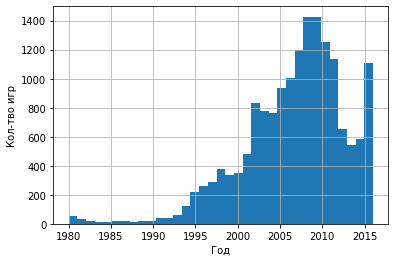

In [ ]:
df['year_of_release'].plot(kind = 'hist',bins = 35, grid =True)
plt.xlabel('Год')
plt.ylabel('Кол-тво игр')
plt.show()

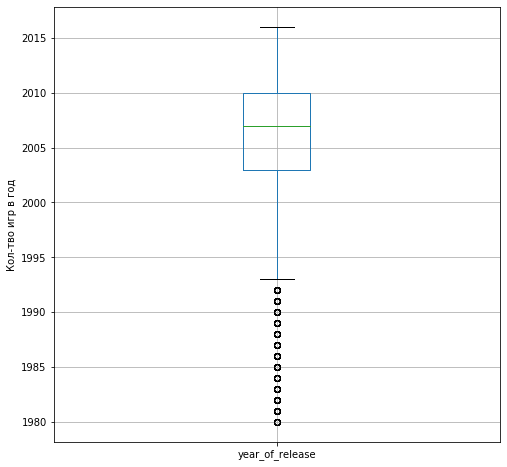

In [ ]:
df.boxplot(['year_of_release'], figsize = (8,8))
plt.ylabel('Кол-тво игр в год')
plt.show()

In [ ]:
df['year_of_release'].describe()

count   16446.00
mean     2006.48
std         5.88
min      1980.00
25%      2003.00
50%      2007.00
75%      2010.00
max      2016.00
Name: year_of_release, dtype: float64

In [ ]:
df['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1984      14
1985      14
1980       9
Name: year_of_release, dtype: int64

In [ ]:
# <coздадим функцию, чтобы избавиться от выбросов>
def section_query(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    section = data[(data[column] >= (q1 - 1.5 * iqr)) & (data[column] <= (q3 + 1.5 * iqr))]
    return section  

In [ ]:
games_date = section_query(df, 'year_of_release')

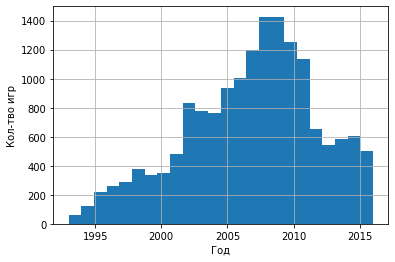

In [ ]:
games_date['year_of_release'].plot(kind = 'hist',bins = 24, grid =True)
plt.xlabel('Год')
plt.ylabel('Кол-тво игр')
plt.show()

In [ ]:
games_date['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      62
Name: year_of_release, dtype: int64

In [ ]:
games_date['year_of_release'].describe()

count   16141.00
mean     2006.87
std         5.20
min      1993.00
25%      2003.00
50%      2008.00
75%      2010.00
max      2016.00
Name: year_of_release, dtype: float64

<b>Очень слабый преиод выпуска игр с 1980 по 1992. Понятно что в этот преиод только все начиналось, и не было подходящих ресурсов, мощностей для реализации большего. Поэтому данные за это период не так важны. С 1993 года до 2008-2009 идет существенный рост выпуска игр(очень хорошо заметен прогресс), далее снова спад, связанный скорее всего с появлением игр на мобильных платформах и онлайн игр.</b>

<ul style="border:solid black 2px; padding: 20px">
    <li>Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?</li>
</ul>

In [ ]:
display(games_date)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,nan,nan,RP,31.38
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.00,8.50,E,29.80
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,nan,nan,RP,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,nan,nan,RP,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,nan,nan,RP,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,nan,nan,RP,0.01


In [ ]:
games_date.groupby('platform')['total_sales'].sum().sort_values(ascending = False)

platform
PS2    1233.56
X360    961.24
PS3     931.34
Wii     891.18
DS      802.76
PS      727.58
PS4     314.14
GBA     312.88
PSP     289.53
3DS     257.81
PC      252.66
XB      251.57
N64     218.01
GC      196.73
XOne    159.32
GB      152.08
SNES    124.69
WiiU     82.19
PSV      53.81
SAT      33.59
DC       15.95
GEN      11.20
NES       3.72
SCD       1.86
NG        1.44
WS        1.42
TG16      0.16
3DO       0.10
PCFX      0.03
Name: total_sales, dtype: float64

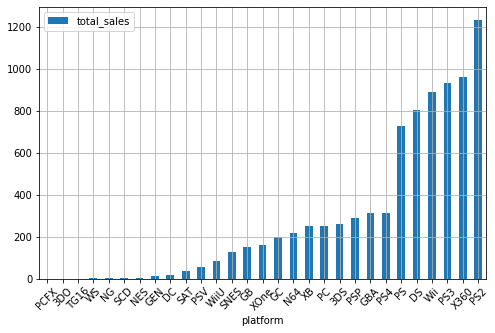

In [ ]:
games_date.groupby('platform')['total_sales'].sum().sort_values(ascending = True).plot(kind = 'bar', figsize=(8,5),grid = True)
plt.legend()
plt.xticks(rotation = 45)
plt.show()

<b>Очень высокие продажи были у PS2 по сравнению с остальными.</b>

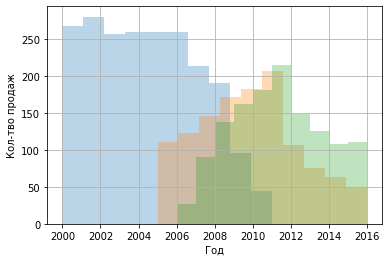

In [ ]:
games_date[games_date['platform'] == 'PS2']['year_of_release'].plot(kind = 'hist',bins = 10, grid =True, alpha = 0.3)
games_date[games_date['platform'] == 'X360']['year_of_release'].plot(kind = 'hist',bins = 10, grid =True, alpha = 0.3)
games_date[games_date['platform'] == 'PS3']['year_of_release'].plot(kind = 'hist',bins = 10, grid =True, alpha = 0.3)
#games_date[games_date['platform'] == 'Wii']['year_of_release'].plot(kind = 'hist',bins = 10, grid =True, alpha = 0.3)
#games_date[games_date['platform'] == 'DS']['year_of_release'].plot(kind = 'hist',bins = 10, grid =True, alpha = 0.3)
#games_date[games_date['platform'] == 'PS']['year_of_release'].plot(kind = 'hist',bins = 10, grid =True, alpha = 0.3)
plt.xlabel('Год')
plt.ylabel('Кол-тво продаж')
plt.show()

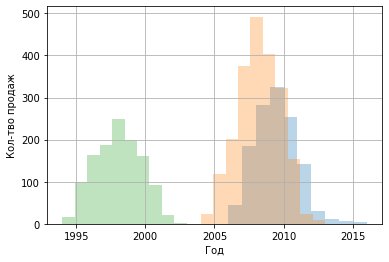

In [ ]:
games_date[games_date['platform'] == 'Wii']['year_of_release'].plot(kind = 'hist',bins = 10, grid =True, alpha = 0.3)
games_date[games_date['platform'] == 'DS']['year_of_release'].plot(kind = 'hist',bins = 10, grid =True, alpha = 0.3)
games_date[games_date['platform'] == 'PS']['year_of_release'].plot(kind = 'hist',bins = 10, grid =True, alpha = 0.3)
plt.xlabel('Год')
plt.ylabel('Кол-тво продаж')
plt.show()

<b>Жизнь PS2</b>

In [ ]:
games_date[games_date['platform'] == 'PS2']['year_of_release'].max() - games_date[games_date['platform'] == 'PS2']['year_of_release'].min()

11

<b>Жизнь X360</b>

In [ ]:
games_date[games_date['platform'] == 'X360']['year_of_release'].max() - games_date[games_date['platform'] == 'X360']['year_of_release'].min()

11

<b>Жизнь PS3</b>

In [ ]:
games_date[games_date['platform'] == 'PS3']['year_of_release'].max() - games_date[games_date['platform'] == 'PS3']['year_of_release'].min()

10

<b>Жизнь Wii</b>

In [ ]:
games_date[games_date['platform'] == 'Wii']['year_of_release'].max() - games_date[games_date['platform'] == 'Wii']['year_of_release'].min()

10

<b>Жизнь DS</b>

In [ ]:
games_date[games_date['platform'] == 'DS']['year_of_release'].max() - games_date[games_date['platform'] == 'DS']['year_of_release'].min()

9

<b>Жизнь PS</b>

In [ ]:
games_date[games_date['platform'] == 'PS']['year_of_release'].max() - games_date[games_date['platform'] == 'PS']['year_of_release'].min()

9

<b>Заметим, что каждая платформа в среднем живет 10 лет. После 2005 года среди платформ растет конкуренция.</b>

<ul style="border:solid black 2px; padding: 20px">
    <li>Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.</li>
    <li>Не учитывайте в работе данные за предыдущие годы.</li>
</ul>


In [ ]:
games_date = games_date.query('year_of_release >= 2006')

In [ ]:
display(df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,nan,nan,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,nan,nan,RP,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,nan,nan,RP,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,nan,nan,RP,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,nan,nan,RP,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,nan,nan,RP,0.01


<ul style="border:solid black 2px; padding: 20px">
    <li>Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.</li>
</ul>

In [ ]:
games_date.groupby('platform')['total_sales'].sum().sort_values(ascending = False)

platform
X360   952.99
PS3    931.34
Wii    891.18
DS     655.35
PS4    314.14
PS2    265.80
3DS    257.81
PSP    238.63
PC     163.42
XOne   159.32
WiiU    82.19
PSV     53.81
GC      11.53
XB      10.77
GBA      8.68
DC       0.06
Name: total_sales, dtype: float64

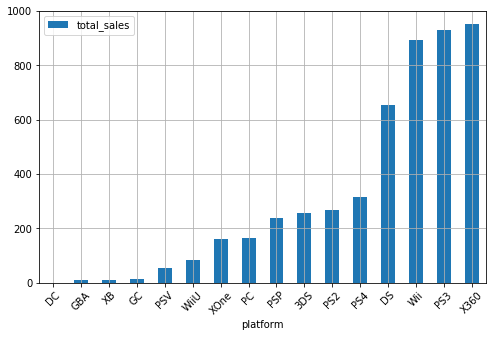

In [ ]:
games_date.groupby('platform')['total_sales'].sum().sort_values(ascending = True).plot(kind = 'bar', figsize=(8,5),grid = True)
plt.legend()
plt.xticks(rotation = 45)
plt.show()

<b>Лидеры продаж за последние 10 лет X360, PS3, Wii, но возможно их пик прошел.</b>

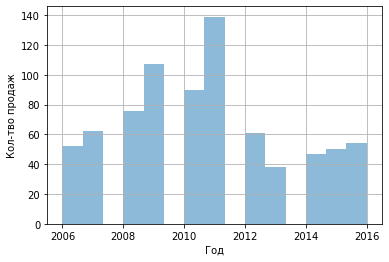

In [ ]:
games_date[games_date['platform'] == 'PC']['year_of_release'].plot(kind = 'hist',bins = 15, grid =True, alpha = 0.5)
plt.xlabel('Год')
plt.ylabel('Кол-тво продаж')
plt.show()

<b>Наблюдается небольшой рост продаж после 2014 года</b>

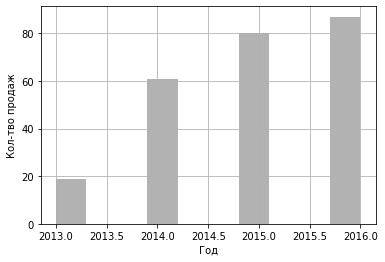

In [ ]:
games_date[games_date['platform'] == 'XOne']['year_of_release'].plot(kind = 'hist',bins = 10, grid =True, alpha = 0.3, color = 'black')
plt.xlabel('Год')
plt.ylabel('Кол-тво продаж')
plt.show()

<b>Пока что прошло 3 года после выпуска платформы, наблюдается положительная динамика роста продаж с каждым годом</b>

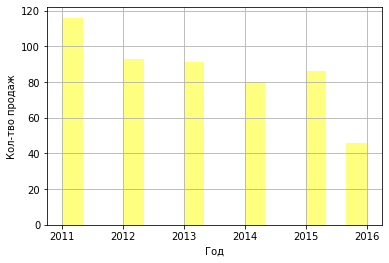

In [ ]:
games_date[games_date['platform'] == '3DS']['year_of_release'].plot(kind = 'hist',bins = 15, grid =True, alpha = 0.5, color = 'yellow')
plt.xlabel('Год')
plt.ylabel('Кол-тво продаж')
plt.show()

<b>Платформе уже 5 лет, скорее всего пик прошел, заметно, что в 2016 году продажи упали почти в 2 раза по сравению с 2015</b>

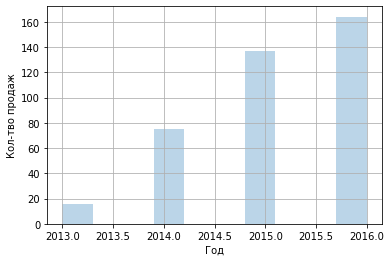

In [ ]:
games_date[games_date['platform'] == 'PS4']['year_of_release'].plot(kind = 'hist',bins = 10, grid =True, alpha = 0.3)
plt.xlabel('Год')
plt.ylabel('Кол-тво продаж')
plt.show()

<b>Платформе PS4 также как и XOne 3 года, положительная динамика продаж с каждым годом. PS4 прямой конкурент XOne</b>

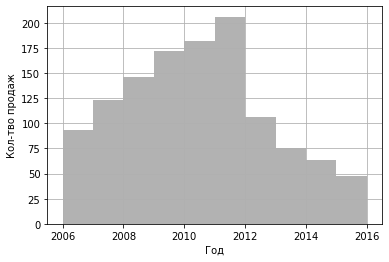

In [ ]:
games_date[games_date['platform'] == 'X360']['year_of_release'].plot(kind = 'hist',bins = 10, grid =True, alpha = 0.3, color = 'black')
plt.xlabel('Год')
plt.ylabel('Кол-тво продаж')
plt.show()

<b>Эпоха X360 подошла к концу, продажи с каждым годом все меньше и меньше</b>

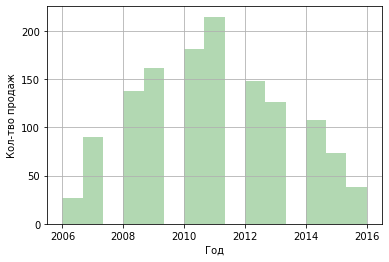

In [ ]:
games_date[games_date['platform'] == 'PS3']['year_of_release'].plot(kind = 'hist',bins = 15, grid =True, alpha = 0.3, color = 'green')
plt.xlabel('Год')
plt.ylabel('Кол-тво продаж')
plt.show()

<b>Еще одни конкуренты своего периода PS3 и X360, и у обоих падают продажи, на их место пришли PS4 и XOne.</b>

In [ ]:
games_date[games_date['year_of_release'] == 2015]['platform'].value_counts()

PS4     137
PSV     110
3DS      86
XOne     80
PS3      73
PC       50
X360     35
WiiU     28
Wii       4
PSP       3
Name: platform, dtype: int64

In [ ]:
games_date[games_date['year_of_release'] == 2016]['platform'].value_counts()

PS4     164
XOne     87
PSV      85
PC       54
3DS      46
PS3      38
WiiU     14
X360     13
Wii       1
Name: platform, dtype: int64

<b>Если взять ТОП-6 лидеров продаж, то только у PS4, XOne прослеживается положительная динамика роста продаж к 2016 году, у PC   после падения продаж до 2013, наблюдается незначительный рост продаж. PS4, XOne судя по всему только находятся в начальной своей стадии, что говорит о возможном росте продаж в след году.</b>

<ul style="border:solid black 2px; padding: 20px">
    <li>Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.</li>
</ul>

<b>Построим по всем платформам за последние 10 лет</b>

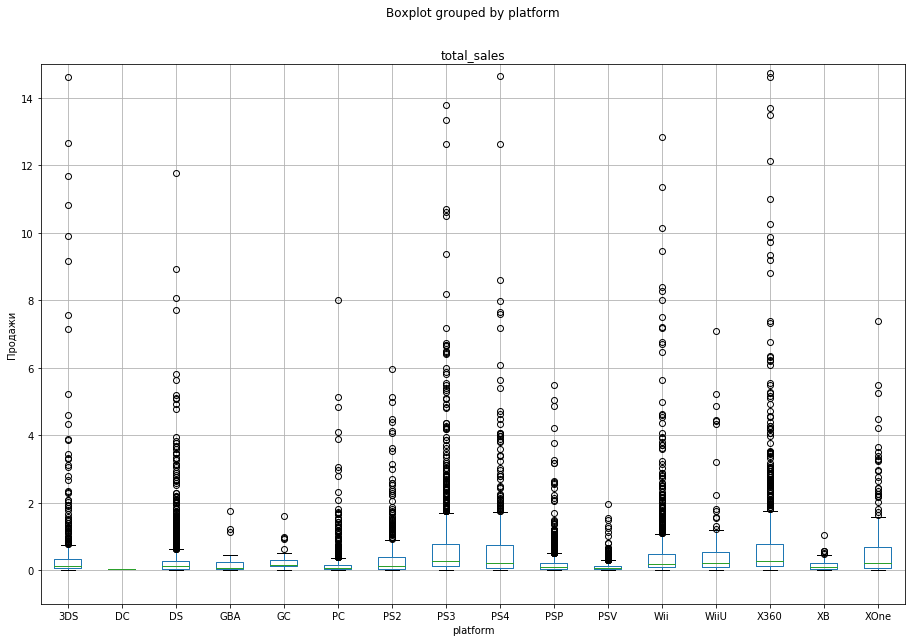

In [ ]:
games_date.boxplot(['total_sales'], by='platform', figsize = (15,10))
plt.ylabel('Продажи')
plt.ylim(-1, 15)
plt.show()

<b>Схожие распределения и медианы у PS3 и X360, PS4 и XOne, все они скошены вправо.</b>
- Заметно кто лидирует по продажам, PS3, PS4, X360, XOne немного отстает. 
- Данные платформы являются наиболее популярными.

<b>Построим диаграмму размаха по трем выбранным платформам</b>

In [ ]:
platform_select = games_date.query('platform == "PS4" or platform == "XOne" or platform == "PC"')

In [ ]:
display(platform_select)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,nan,nan,RP,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.00,4.30,E,8.58
85,The Sims 3,PC,2009,Simulation,0.99,6.42,0.00,0.60,86.00,7.60,T,8.01
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,nan,nan,RP,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16690,Pony Friends 2,PC,2009,Simulation,0.00,0.01,0.00,0.00,nan,nan,RP,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.00,7.60,M,0.01
16696,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,61.00,5.80,T,0.01
16702,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.00,60.00,7.20,E10+,0.01


In [ ]:
platform_select.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,1415.00,1415.00,1415.00,1415.00,1415.00,996.00,1054.00,1415.00
mean,2012.63,0.17,0.21,0.01,0.06,73.75,6.76,0.45
std,3.10,0.45,0.52,0.04,0.16,11.90,1.49,1.07
min,2006.00,0.00,0.00,0.00,0.00,19.00,1.40,0.01
25%,2010.00,0.00,0.02,0.00,0.00,67.00,5.93,0.03
50%,2014.00,0.02,0.04,0.00,0.01,76.00,7.10,0.08
75%,2015.00,0.11,0.16,0.00,0.04,82.00,7.90,0.37
max,2016.00,6.03,6.42,0.49,2.38,97.00,9.30,14.63


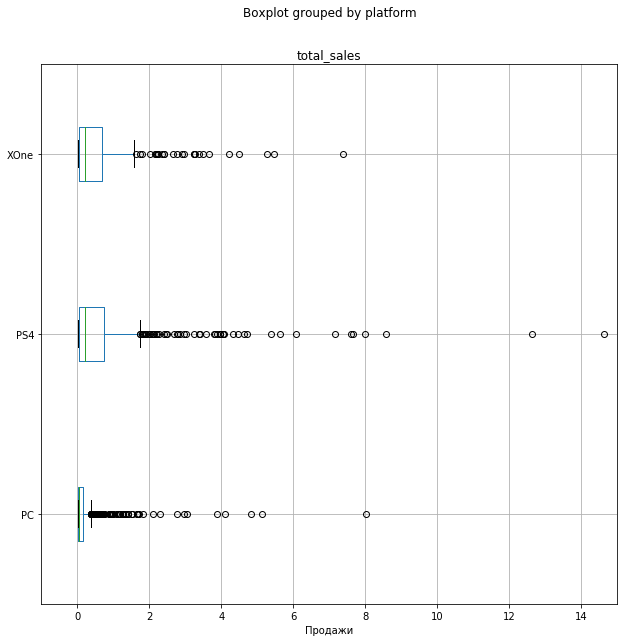

In [ ]:
platform_select.boxplot(['total_sales'], by='platform', figsize = (10,10), vert = False)
plt.xlabel('Продажи')
plt.xlim(-1, 15)
plt.show()

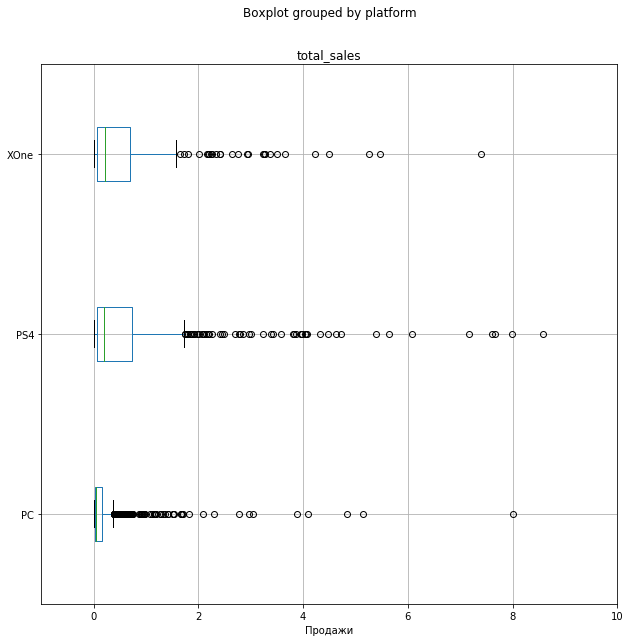

In [ ]:
platform_select.boxplot(['total_sales'], by='platform', figsize = (10,10), vert = False)
plt.xlabel('Продажи')
plt.xlim(-1, 10)
plt.show()

In [ ]:
platform_select.groupby(['platform']).agg({'total_sales':{'sum', 'mean', 'median'}})

total_sales            
                 sum mean median
platform                        
PC            163.42 0.21   0.05
PS4           314.14 0.80   0.20
XOne          159.32 0.65   0.22

<b>Близки медианы у PS4 и XOne, все они скошены вправо.</b>

<b>Заметим насколько больше продаж, а значит и популярнее у нас игры на платформе PS4 </b>

<ul style="border:solid black 2px; padding: 20px">
    <li>Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.</li>
</ul>

In [ ]:
display(platform_select)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,nan,nan,RP,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.00,4.30,E,8.58
85,The Sims 3,PC,2009,Simulation,0.99,6.42,0.00,0.60,86.00,7.60,T,8.01
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,nan,nan,RP,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16690,Pony Friends 2,PC,2009,Simulation,0.00,0.01,0.00,0.00,nan,nan,RP,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.00,7.60,M,0.01
16696,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,61.00,5.80,T,0.01
16702,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.00,60.00,7.20,E10+,0.01


<b>Рассмотрим платформу PS4</b>

In [ ]:
corrMatrix_PS4 = platform_select[platform_select['platform'] == 'PS4']

In [ ]:
corrMatrix_PS4 = corrMatrix_PS4[['total_sales','user_score','critic_score']]

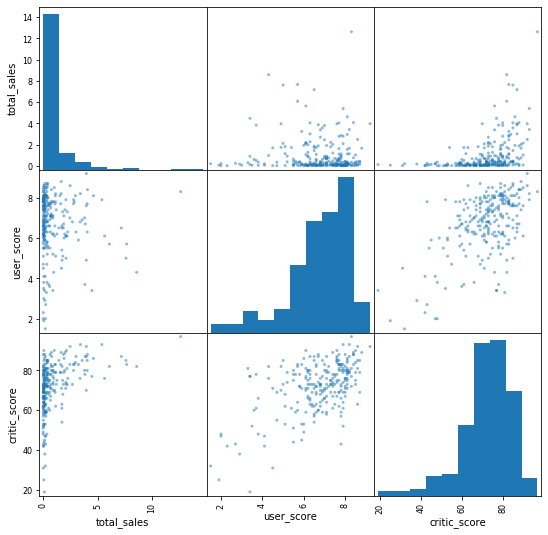

In [ ]:
pd.plotting.scatter_matrix(corrMatrix_PS4, figsize=(9,9))
plt.show()

In [ ]:
corrMatrix_PS4 = corrMatrix_PS4.corr()

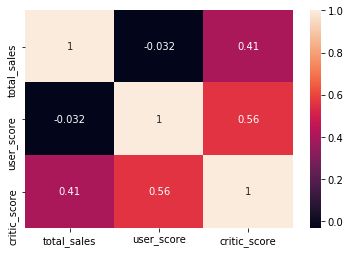

In [ ]:
sn.heatmap(corrMatrix_PS4, annot=True)
plt.show()

1. <b>Корреляция между продажами и отзывами пользователей <b>-0,032</b> говорит о том, что связи нет. Выходит, отзывы пользователей никак не влияют на увеличение продаж.
2. Корреляция между продажами и отзывами критиков <b>0,41</b>, говорит о наличии связи, однако слабой. Выходит, отзывами критиков могут повлиять на продажи, но так бывает не всегда.
3. Корреляция между отзывами пользователей и отзывами критиков <b>0,56</b>, говорит о наличии связи, однако слабой. Выходит, отзывы критиков могут совпасть с отзывами пользователей, но так бывает не всегда.
</b>

<ul style="border:solid black 2px; padding: 20px">
    <li>Соотнесем выводы с продажами игр на других платформах.</li>
</ul>

In [ ]:
corrMatrix_PC = platform_select[platform_select['platform'] == 'PC']
corrMatrix_PC = corrMatrix_PC[['total_sales','user_score','critic_score']].corr()

In [ ]:
corrMatrix_XOne = platform_select[platform_select['platform'] == 'XOne']
corrMatrix_XOne = corrMatrix_XOne[['total_sales','user_score','critic_score']].corr()

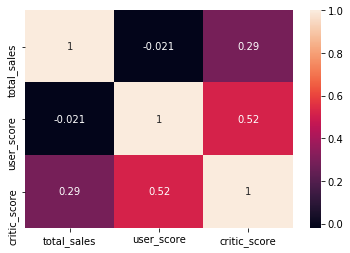

In [ ]:
sn.heatmap(corrMatrix_PC, annot=True)
plt.show()

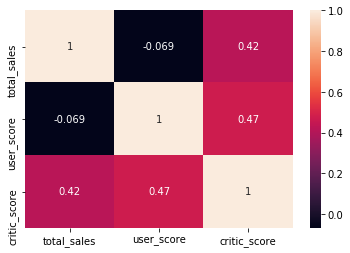

In [ ]:
sn.heatmap(corrMatrix_XOne, annot=True)
plt.show()

<b>Схожая ситуация завсисимостей как и на платформе PS4.</b>

<ul style="border:solid black 2px; padding: 20px">
    <li>Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?</li>
</ul>

<b>Рассмотрим за все время</b>

In [ ]:
df['genre'].value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
No genre           2
Name: genre, dtype: int64

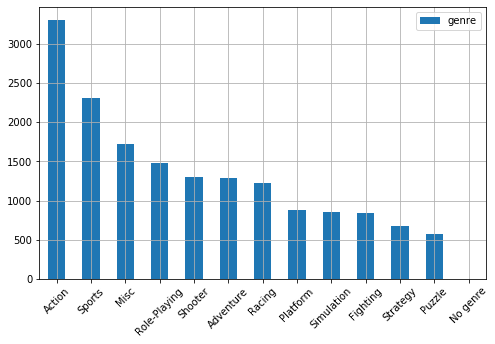

In [ ]:
df['genre'].value_counts().plot(kind = 'bar', figsize=(8,5),grid = True)
plt.legend()
plt.xticks(rotation = 45)
plt.show()

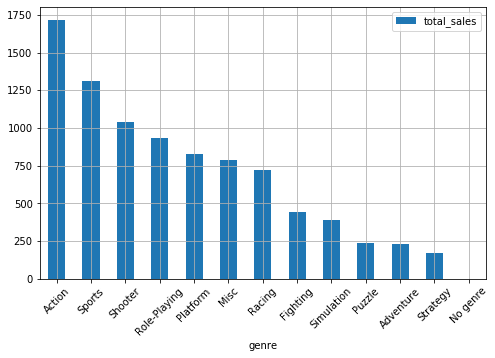

In [ ]:
df.groupby('genre').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending = False).plot(kind = 'bar', figsize=(8,5),grid = True)
plt.xticks(rotation = 45)
plt.show()

<b>Лидируют в списке Action и Sports. Самые популярные жанры приносят большую прибыль, все логично. Удивляет жанр Adventure, весьма популярный, а прибыли от него маловато, что не скажешь про Shooter, где все наоборот.</b>

<b>Рассмотрим за последние 10 лет.</b>

In [ ]:
games_date['genre'].value_counts()

Action          2382
Sports          1262
Misc            1253
Adventure       1023
Role-Playing     996
Shooter          737
Simulation       606
Racing           562
Fighting         413
Strategy         393
Puzzle           366
Platform         340
Name: genre, dtype: int64

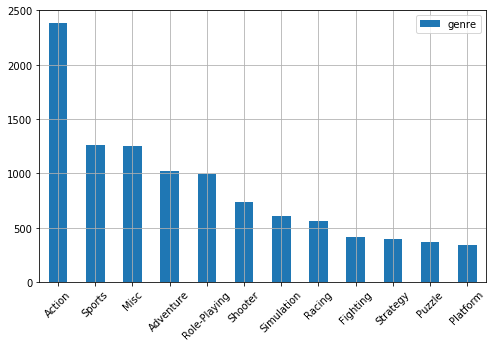

In [ ]:
games_date['genre'].value_counts().plot(kind = 'bar', figsize=(8,5),grid = True)
plt.legend()
plt.xticks(rotation = 45)
plt.show()

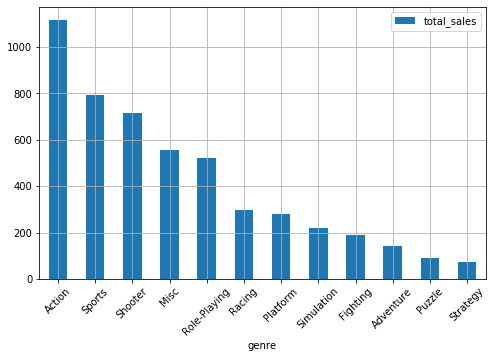

In [ ]:
games_date.groupby('genre').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending = False).plot(kind = 'bar', figsize=(8,5),grid = True)
plt.xticks(rotation = 45)
plt.show()

<b>Наблюдается схожая картина, интересы не меняются.</b>

## Составим портрет пользователя каждого региона

<b>Определим для пользователя каждого региона (NA, EU, JP):</b>

<ul style="border:solid black 2px; padding: 20px">
    <li>Самые популярные платформы (топ-5). Опишем различия в долях продаж.</li>
</ul>

In [ ]:
display(games_date)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.00,8.50,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.00,6.60,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,nan,nan,RP,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,nan,nan,RP,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,nan,nan,RP,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,nan,nan,RP,0.01


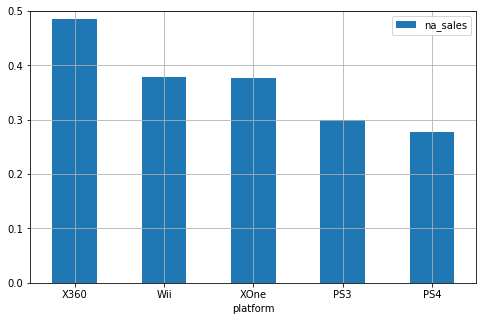

In [ ]:
games_date.groupby('platform').agg({'na_sales':'mean'}).sort_values(by='na_sales', ascending = False).head(5).plot(kind = 'bar', figsize=(8,5),grid = True)
plt.ylim(0, 0.5)
plt.xticks(rotation = 0)
plt.show()

<b>В Северной Америке больше отдают предпочтение X360, XOne.</b>

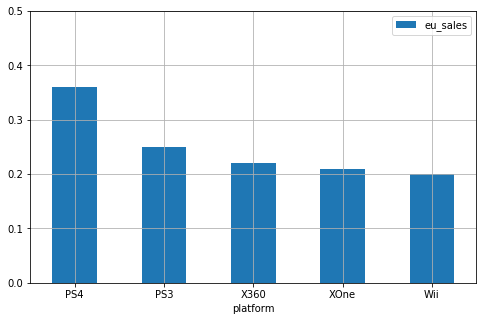

In [ ]:
games_date.groupby('platform').agg({'eu_sales':'mean'}).sort_values(by='eu_sales', ascending = False).head(5).plot(kind = 'bar', figsize=(8,5),grid = True)
plt.ylim(0, 0.5)
plt.xticks(rotation = 0)
plt.show()

<b>В Европе больше PS4 и PS3</b>

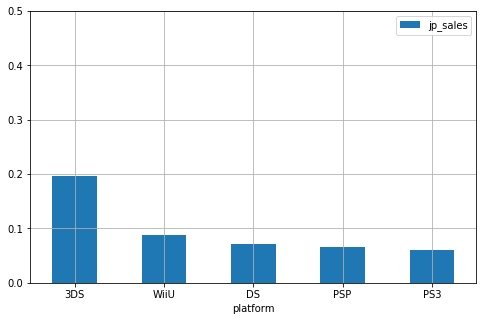

In [ ]:
games_date.groupby('platform').agg({'jp_sales':'mean'}).sort_values(by='jp_sales', ascending = False).head(5).plot(kind = 'bar', figsize=(8,5),grid = True)
plt.ylim(0, 0.5)
plt.xticks(rotation = 0)
plt.show()

<b>Заметим, что рынки по интересам среди платформ ТОП-5 у Северной Америки и Европы совпадают. В Северной Америке преобладают продажи Х360, в Европе PS4. Продажи Wii и XOne в Северной Америке почти в два раза выше, чем в Европе. В Японии рынок интересов совершенно другой и прибыль с них намного меньше.</b>

<ul style="border:solid black 2px; padding: 20px">
    <li>Самые популярные жанры (топ-5). Поясним разницу.</li>
</ul>

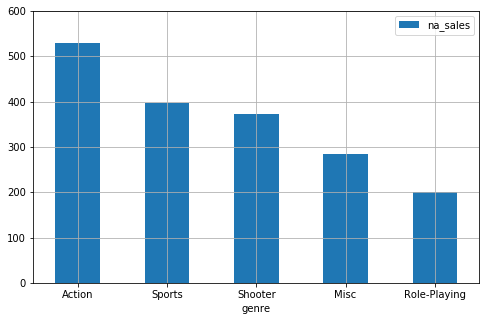

In [ ]:
games_date.groupby('genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending = False).head(5).plot(kind = 'bar', figsize=(8,5),grid = True)
plt.ylim(0, 600)
plt.xticks(rotation = 0)
plt.show()

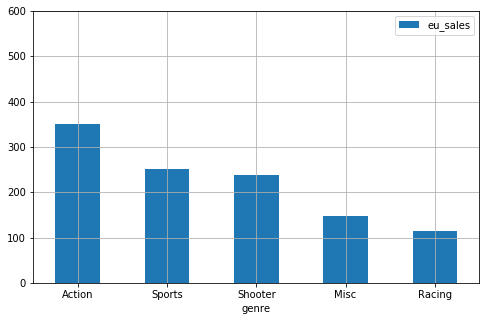

In [ ]:
games_date.groupby('genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending = False).head(5).plot(kind = 'bar', figsize=(8,5),grid = True)
plt.ylim(0, 600)
plt.xticks(rotation = 0)
plt.show()

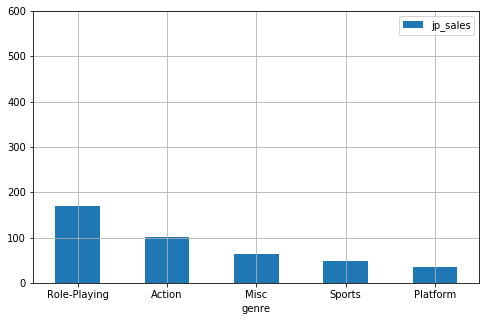

In [ ]:
games_date.groupby('genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending = False).head(5).plot(kind = 'bar', figsize=(8,5),grid = True)
plt.ylim(0, 600)
plt.xticks(rotation = 0)
plt.show()

<b>Снова совпадение интересов по жанрам у Северной Америки и Европы, но по продажам Северная Америка значительно преобладает, возможно это связано, с более развитой игровой индустрией, рекламой и продвижением. В Японии преобладают ролевые игры, и продажи ниже чем в Европе, но и людей в Японии намного меньше, отсюда и продаж возможно меньше.</b>

<ul style="border:solid black 2px; padding: 20px">
    <li>Влияет ли рейтинг ESRB на продажи в отдельном регионе?</li>
</ul>

In [ ]:
display(games_date)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.00,8.50,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.00,6.60,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,nan,nan,RP,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,nan,nan,RP,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,nan,nan,RP,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,nan,nan,RP,0.01


<b>Рейтинги ESRB в Северной Америке</b>

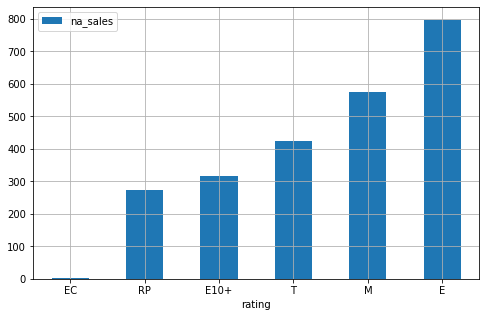

In [ ]:
games_date.groupby('rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending = True).plot(kind = 'bar', figsize=(8,5),grid = True)
plt.xticks(rotation = 0)
plt.show()

<b>Рейтинги ESRB в Европе</b>

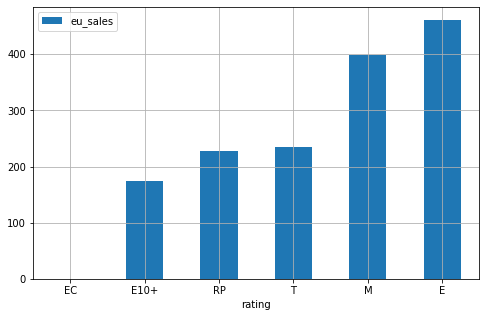

In [ ]:
games_date.groupby('rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending = True).plot(kind = 'bar', figsize=(8,5),grid = True)
plt.xticks(rotation = 0)
plt.show()

<b>Рейтинги ESRB в Японии</b>

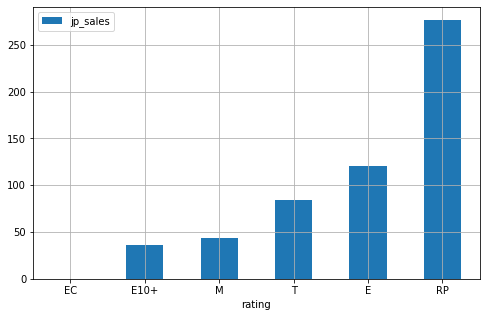

In [ ]:
games_date.groupby('rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending = True).plot(kind = 'bar', figsize=(8,5),grid = True)
plt.xticks(rotation = 0)
plt.show()

<b>Конечно же рейтинг ESRB влияет на продажи в каждом из регионов. Если игры находятся в рейтинге Е, то там самая большая продажа. Получается выгодно выпускать игры с рейтингом E и M, T.<b>

## Проверяем гипотезы

<ul style="border:solid black 2px; padding: 20px">
    <li>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;</li>
</ul>

<b>Используем t-критерий Стъюдента, так как сравниваемые выборки независимы между собой.</b>

<b>Так как у нас генеральных совокупности две, и нам необходимо сопоставить их средние, то применим гипотезу о равенстве средних двух генеральных совокупностей.</b>

<b> Сформулируем гипотезы:
    <ul>
        <li>H0: Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые;</li>
        <li>H1: Средние пользовательские рейтинги платформ Xbox One и PC различается;</li>
    </ul> 
</b>

In [ ]:
display(games_date)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.00,8.50,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.00,6.60,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,nan,nan,RP,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,nan,nan,RP,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,nan,nan,RP,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,nan,nan,RP,0.01


In [ ]:
alpha = 0.05

In [ ]:
df.dropna(subset = ['user_score'], inplace = True)

In [ ]:
xbox_one = df[(df['platform'] == 'XOne')]['user_score']
pc = df[(df['platform'] == 'PC') ]['user_score']

In [ ]:
xbox_one.var()

1.9069968429360695

In [ ]:
pc.var()

2.349224375076853

In [ ]:
results = st.ttest_ind(xbox_one, pc)

In [ ]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.3037979620149106e-05
Отвергаем нулевую гипотезу


<b>Присутствуют значимые различия между выборками.</b>

<ul style="border:solid black 2px; padding: 20px">
    <li>Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные;</li>
</ul>

<b> Сформулируем гипотезы:
    <ul>
        <li>H0: Средние пользовательские рейтинги жанров Action и Sports не разные;</li>
        <li>H1: Средние пользовательские рейтинги жанров Action и Sports разные;</li>
    </ul> 
</b>

In [ ]:
action_df = df[df['genre'] == 'Action']['user_score']
sports_df = df[df['genre'] == 'Sports']['user_score']

In [ ]:
action_df.var()

2.027493768262496

In [ ]:
sports_df.var()

2.623055812519272

In [ ]:
results = st.ttest_ind(action_df, sports_df)

In [ ]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.06480928064420527
Не получилось отвергнуть нулевую гипотезу


<b>Полученное значение p-value говорит о том, что хотя пользовательские рейтинги Action и Sports неодинаковые, но с вероятностью примерно 6% такое или большее различие можно получить случайно.</b> 

## Общий вывод

1. С точки зрения прибыли, компании нужно скорректировать рекламный бюджет по отношению к играм жанров <b>Action, Sports</b>(их продается больше) на рынке Северной Америки и Европы, в Японии также стоит больше отметить <b>Role-Playing</b>. 
2. Необходимо учесть, что рекламную политику стоит проводить по играм, которые на платформах <b>PS4 и XOne</b>, все таки у них наблюдается положительная динамика по количеству продаж за год. Так как данные по этим платформам у нас с 2013-2016 и мы видим рост, а в среднем платформы живут на рынке 10 лет, то вероятно года 2-3 продажи будут расти. Возможно, не стоит забывать и про игры на <b>PC</b>, так как последние 2 года также наблюдается рост, хоть и очень незначительный.
3. Также при запуске рекламной компании нужно учесть данные о рейтингах(возрастной категории) от компании ESRB, так как оказывается, наиболее прибыльнее игры с рейтингами <b>E(для всех), Т(13+), М(18+)</b>.  
5. Средние пользовательские рейтинги платформ <b>Xbox One и PC</b> разные, значимые различия есть, тем не менее между средними пользовательскими рейтингами жанров <b>Action и Sports</b> делать вывод о значимом различии между средними не стоит.

<b>Рекомендации по совершенствованию системы:</b>
1. Реализовать автоматичесткий подсчет общей выручки с продаж.
2. Реализовать фильтрацию показателей по годам, по платформам или по жанрам в целом, также можно и по рейтингам, рынкам.
3. Обратить внимание на типы данных, там, где числовые значения, выгружать в int или float.